In [1]:
#librerias
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split
from statistics import mean
#librerias de métricas
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

#Librerias de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from tensorflow.keras import Model, Input
from tensorflow.keras import layers
from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

#librerías gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#titanicDF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trabajo DataScience/train.csv')
titanicDF = pd.read_csv('train.csv')
titanicDF.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# **Revisión de los datos**

In [3]:
titanicDF.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanicDF[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [5]:
titanicDF[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
titanicDF[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [7]:
titanicDF[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


C:\Users\n64eg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

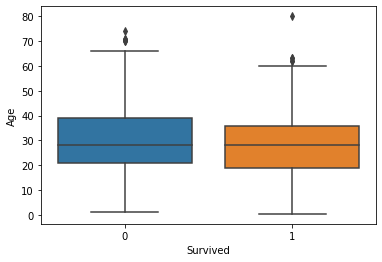

In [8]:
sns.boxplot('Survived','Age', data=titanicDF)

# **Trabajo con los datos**

**A. LIMPIEZA DE DATOS**

A.1.Tramiento de valores nulos

In [9]:
valores_nulos_contador = titanicDF.isnull().sum()
valores_nulos_contador

##como la cabina tiene un alto número de nulos -> retiraremos la columna el análisis
titanicDF = titanicDF.drop('Cabin',1)
##para la edad  lo reemplazaré por los valores medios
media = titanicDF.Age.mean() 
media
titanicDF.Age[titanicDF.Age.isnull()] =27
##para el embarked  -> retiro las filas nulas del análisis 
titanicDF = titanicDF.dropna()

valores_nulos_contador = titanicDF.isnull().sum()
valores_nulos_contador


<ipython-input-9-b3c3936deb89>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanicDF.Age[titanicDF.Age.isnull()] =27


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

A.2.Creación de nuevas columnas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,IsAlone,IsAlone_cat,SibSp_Norm,Fare_Norm,Parch_Norm
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0,False,0.431350,-0.500240,-0.474326
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Miss,0,False,0.431350,0.788947,-0.474326
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1,True,-0.475199,-0.486650,-0.474326
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Miss,0,False,0.431350,0.422861,-0.474326
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1,True,-0.475199,-0.484133,-0.474326
5,6,0,3,"Moran, Mr. James",male,27.0,0,0,330877,8.4583,Q,Mr,1,True,-0.475199,-0.475913,-0.474326
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,1,True,-0.475199,0.397946,-0.474326
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Mr,0,False,2.244449,-0.221900,0.765897
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Miss,0,False,-0.475199,-0.422057,2.006119
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Miss,0,False,0.431350,-0.040787,-0.474326


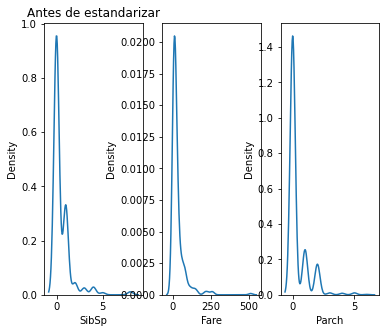

In [10]:
#Columna Title
titanicDF['Title'] = titanicDF.Name.apply(lambda x: x.split(',')[1].split(' ')[1].strip())

titanicDF['Title'] = titanicDF['Title'].replace(['Countess.','Capt.', 'Col.','Don.', 'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'the'],'Rare')
titanicDF['Title'] = titanicDF['Title'].replace(['Ms.','Lady.', 'Dona.','Mrs.','Mlle.', 'Miss.'], 'Miss')
titanicDF['Title'] = titanicDF['Title'].replace('Mme.', 'Mrs')
titanicDF['Title'] = titanicDF['Title'].replace(['Master.','Mr.'], 'Mr')

#Columna está acompañado
titanicDF['IsAlone'] = titanicDF['SibSp'] + titanicDF['Parch'] < 1
titanicDF['IsAlone_cat'] = titanicDF['IsAlone']
titanicDF['IsAlone'] = titanicDF['IsAlone'].astype(int)

#Vamos a estandarizar algunas columnas
#revisamos si las variables tiene una distribución normal:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(6,5))
ax1.set_title('Antes de estandarizar')
sns.kdeplot(titanicDF['SibSp'], ax=ax1)
sns.kdeplot(titanicDF['Fare'], ax=ax2)
sns.kdeplot(titanicDF['Parch'], ax=ax3)

scaler = preprocessing.StandardScaler()
titanicDF[['SibSp_Norm','Fare_Norm','Parch_Norm']] = scaler.fit_transform(titanicDF[['SibSp','Fare','Parch']])
scaler = preprocessing.Normalizer(norm='l2', copy=True)

titanicDF.head(10)


A.3.Creación de variables dummy

In [11]:
#Creación de variables dummy
titanicDF = pd.get_dummies(titanicDF, columns = ["Sex"], drop_first = True)
titanicDF = pd.get_dummies(titanicDF, columns = ["Pclass","Embarked","Title","IsAlone_cat"])

titanicDF.head(10)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,IsAlone,SibSp_Norm,...,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,IsAlone_cat_False,IsAlone_cat_True
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0.431350,...,1,0,0,1,0,1,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0.431350,...,0,1,0,0,1,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,-0.475199,...,1,0,0,1,1,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0.431350,...,0,0,0,1,1,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,-0.475199,...,1,0,0,1,0,1,0,0,0,1
5,6,0,"Moran, Mr. James",27.0,0,0,330877,8.4583,1,-0.475199,...,1,0,1,0,0,1,0,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,1,-0.475199,...,0,0,0,1,0,1,0,0,0,1
7,8,0,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,0,2.244449,...,1,0,0,1,0,1,0,0,1,0
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,0,-0.475199,...,1,0,0,1,1,0,0,0,1,0
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,0,0.431350,...,0,1,0,0,1,0,0,0,1,0


**B.ALGORTIMOS**

*Usaremos los algoritmos de Regresión logística, RandomForest, KNN, Decision Tree y Redes Neuronales*

In [12]:
def modelo_RegresionLogistica( X_train, y_train, X_test, y_test):
  logistic_model = LogisticRegression(C=1e5, solver='lbfgs', max_iter=1000)
  logistic_model = logistic_model.fit(X_train, y_train)
  predictions = logistic_model.predict(X_test)
  resultado = logistic_model.score(X_test,y_test)
  modelo_str = 'Regresion Logistica'
  modelo_fit =logistic_model
  
  print("Modelo = LogisticRegression Resultado =",resultado)
  print(classification_report(y_test,predictions))
  print(f'Confusion Matrix {plot_confusion_matrix(modelo_fit, X_test, y_test)}')  

def modelo_DecisionTree( X_train, y_train, X_test, y_test,p_max_depth):
  clf = tree.DecisionTreeClassifier(max_depth=p_max_depth)
  clf = clf.fit(X_train, y_train)
  predicciones = clf.predict(X_test)
  resultado = sqrt(mean((predicciones - y_test)**2))
  modelo_fit = clf
  
  print("Modelo = DecisionTree Resultado =",resultado)
  print(classification_report(y_test,predicciones))
  print(f'Confusion Matrix {plot_confusion_matrix(modelo_fit, X_test, y_test)}')  

def modelo_RandomForest( X_trainrf, y_trainrf, X_testrf, y_testrf, p_n_estimators, p_min_samples_leaf, p_random_state ):
  results_rf = []
  rf = RandomForestClassifier(n_estimators=p_n_estimators, min_samples_leaf = p_min_samples_leaf, random_state=p_random_state)
  rf.fit(X_trainrf, y_trainrf)
  #modelo_fit =rf.fit(X_trainrf, y_trainrf)
  predictions = rf.predict(X_testrf)
  result = np.sqrt(np.mean((y_testrf - predictions)**2))
  results_rf.append(result) 

  print("Modelo = RandomForestClassifier Resultado = ",np.mean(results_rf))
  print(classification_report(y_testrf,predictions))
  print(f'Confusion Matrix {plot_confusion_matrix(rf.fit(X_trainrf, y_trainrf), X_testrf, y_testrf)}')  

 
def modelo_KNeighborsClassifier (X_train,y_train, X_test, y_test, p_n_neighbors):
  results_knn = []
  knn_model = KNeighborsClassifier(n_neighbors=p_n_neighbors)
  knn_model = knn_model.fit(X_train, y_train)
  predictions = knn_model.predict(X_test)
  resultado = np.sqrt(np.mean((y_test - predictions)**2))
  result = np.sqrt(np.mean((y_test - predictions)**2))
  
  print("Modelo = KNeighborsClassifier Resultado = ",result)
  print(classification_report(y_test,predictions))
  print(f'Confusion Matrix {plot_confusion_matrix(knn_model, X_test, y_test)}')  
  

  

B.1. RandomForestClassifier

Modelo = RandomForestClassifier Resultado =  0.41053541362798
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       108
           1       0.88      0.66      0.75        70

    accuracy                           0.83       178
   macro avg       0.85      0.80      0.81       178
weighted avg       0.84      0.83      0.83       178

Confusion Matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000159ADFEEB80>
Modelo = RandomForestClassifier Resultado =  0.44971901339751685
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       116
           1       0.77      0.60      0.67        62

    accuracy                           0.80       178
   macro avg       0.79      0.75      0.76       178
weighted avg       0.79      0.80      0.79       178

Confusion Matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000159ADFF3070>

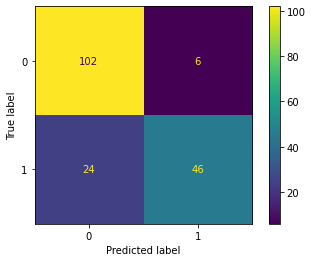

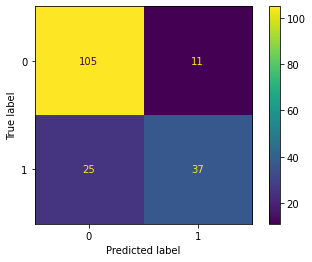

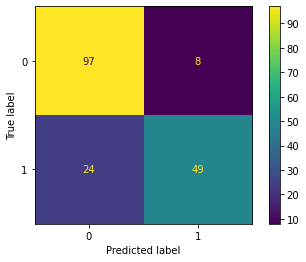

In [13]:
# RandomForestClassifier(RF) agregando titles Is Alone Matriz de confusion y classification report

X = titanicDF[['Age','SibSp','Parch', 'Fare','Sex_male','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','Title_Miss','Title_Mr','Title_Mrs','Title_Rare','IsAlone']]
y = titanicDF['Survived']
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(X, y, test_size=0.2)

modelo_RandomForest( X_trainrf, y_trainrf, X_testrf, y_testrf,  50, 7, 123 )

# RandomForestClassifier(RF) agregando titles Is Alone Matriz de confusion y classification report
#con diferentes parametros
X = titanicDF[['Age','SibSp','Parch', 'Fare','Sex_male','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','Title_Miss','Title_Mr','Title_Mrs','Title_Rare','IsAlone']]
y = titanicDF['Survived']
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(X, y, test_size=0.2)

modelo_RandomForest( X_trainrf, y_trainrf, X_testrf, y_testrf,  100, 10, 200 )

# RandomForestClassifier(RF) agregando  IsAlone, Matriz de confusion y classification report
#con diferentes parametros
X = titanicDF[['Age','SibSp','Parch', 'Fare','Sex_male','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','Title_Miss','IsAlone']]
y = titanicDF['Survived']
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(X, y, test_size=0.2)

modelo_RandomForest( X_trainrf, y_trainrf, X_testrf, y_testrf,  100, 10, 200 )



B.2.KNN

Modelo = KNeighborsClassifier Resultado =  0.43057317430021846
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.78      0.75      0.76        71

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.81       178
weighted avg       0.81      0.81      0.81       178

Confusion Matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000159ADF84970>
Modelo = KNeighborsClassifier Resultado =  0.40363516734125976
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.83      0.75      0.79        71

    accuracy                           0.84       178
   macro avg       0.84      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178

Confusion Matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000159ADF84970>


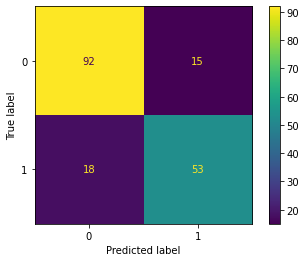

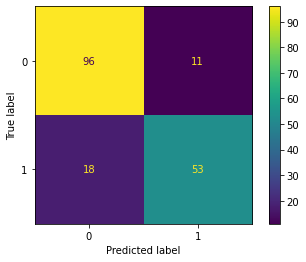

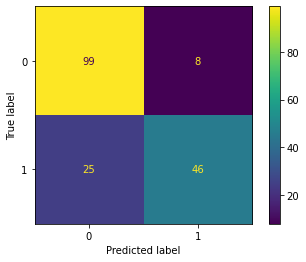

In [14]:
#Variaciones del model KNN

#KNN con datos estandarizados
#agregando la funcion Classification report y confusion matrix
#estandarizamos o normalizamos la informacion del DF
scaler = StandardScaler()
scaler.fit(titanicDF.drop(['Survived','Name','Ticket'],axis=1))
scaled_features = scaler.transform(titanicDF.drop(['Survived','Name','Ticket'],axis=1))
df_feat = pd.DataFrame(scaled_features, columns=['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'IsAlone','IsAlone_cat_True','IsAlone_cat_False','SibSp_Norm','Fare_Norm','Parch_Norm'])
#una vez estandarizado generamos las nuevas variables del modelo.
X= df_feat
y=titanicDF['Survived']

X_trainkn, X_testkn, y_trainkn, y_testkn = train_test_split(X, y, test_size=0.2, random_state=101)
# Corremos el modelo nuevamente
modelo_KNeighborsClassifier (X_trainkn,y_trainkn, X_testkn, y_testkn, 5)


#KNN con datos estandarizados sin Title, IsAlone
#agregando la funcion Classification report y confusion matrix
X= df_feat[['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S']]
y=titanicDF['Survived']
X_trainkn, X_testkn, y_trainkn, y_testkn = train_test_split(X, y, test_size=0.2, random_state=101)
# Corremos el modle nuevamente
modelo_KNeighborsClassifier (X_trainkn,y_trainkn, X_testkn, y_testkn, 5)


#KNN con datos estandarizados sin Title, IsAlon y con mayor número de veicnos.
#agregando la funcion Classification report y confusion matrix
X= df_feat[['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S']]
y=titanicDF['Survived']
X_trainkn, X_testkn, y_trainkn, y_testkn = train_test_split(X, y, test_size=0.2, random_state=101)
# Corremos el modle nuevamente
modelo_KNeighborsClassifier (X_trainkn,y_trainkn, X_testkn, y_testkn, 9)


B.3.Regresión Logísitca

Modelo = LogisticRegression Resultado = 0.797752808988764
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       112
           1       0.78      0.64      0.70        66

    accuracy                           0.80       178
   macro avg       0.79      0.76      0.77       178
weighted avg       0.80      0.80      0.79       178

Confusion Matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000159ADF01A60>
Modelo = LogisticRegression Resultado = 0.7752808988764045
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       106
           1       0.78      0.62      0.69        72

    accuracy                           0.78       178
   macro avg       0.78      0.75      0.76       178
weighted avg       0.78      0.78      0.77       178

Confusion Matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000159AE221FD0>
Modelo = 

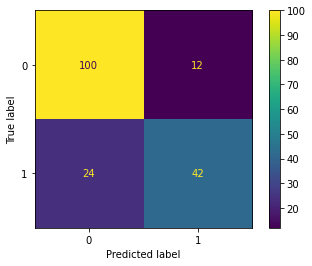

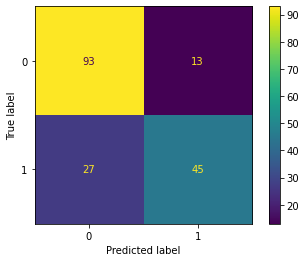

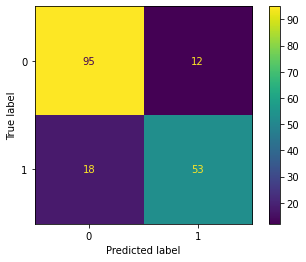

In [15]:
#Regresión Logistica

# 1: con las variables base 
y_RL = titanicDF['Survived']
X_RL_1 = titanicDF[['Age','SibSp','Parch', 'Fare','Sex_male','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S']]
X_train, X_test, y_train, y_test = train_test_split(X_RL_1, y_RL, test_size=0.2)

modelo_RegresionLogistica( X_train, y_train, X_test, y_test)

# 2: con las variables base + titulo + isAlone 
X_RL_2 = titanicDF[['Age','SibSp','Parch', 'Fare','Sex_male','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','Title_Miss', \
                    'Title_Mr', 'Title_Mrs', 'Title_Rare', 'IsAlone_cat_True']]
X_train, X_test, y_train, y_test = train_test_split(X_RL_2, y_RL, test_size=0.2)
modelo_RegresionLogistica( X_train, y_train, X_test, y_test, )

# 3: con las variables base + titulo + isAlone 
# normalizando la tarifa,sib y parch y volviendo variables y usando is_alone como dummy
X_RL_2 = titanicDF[['Age','SibSp_Norm','Parch_Norm', 'Fare_Norm','Sex_male','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','Title_Miss', \
                    'Title_Mr', 'Title_Mrs', 'Title_Rare', 'IsAlone_cat_True']]
X_train, X_test, y_train, y_test = train_test_split(X_RL_2, y_RL, test_size=0.2)
modelo_RegresionLogistica( X_train, y_train, X_test, y_test)



B.4.DecisionTree

Modelo = DecisionTree Resultado = 0.4370483222197017
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.74      0.76      0.75        68

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

Confusion Matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000159AE2AB640>
Modelo = DecisionTree Resultado = 0.4434289272060925
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

Confusion Matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000159AE2AB640>
Modelo = DecisionTre

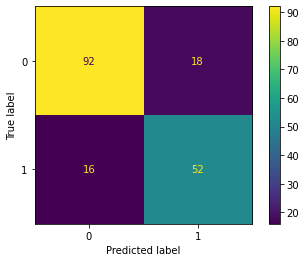

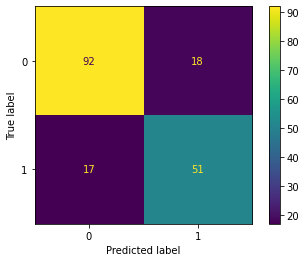

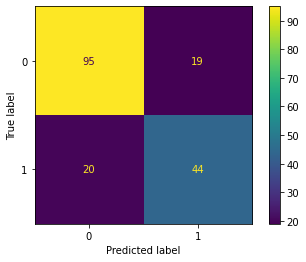

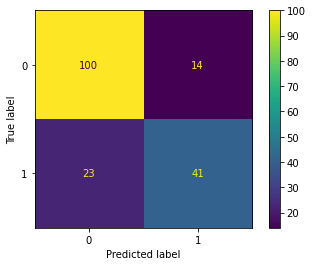

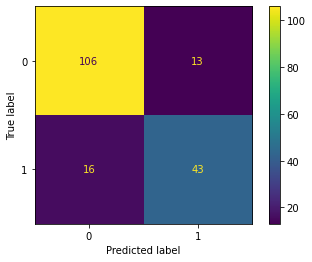

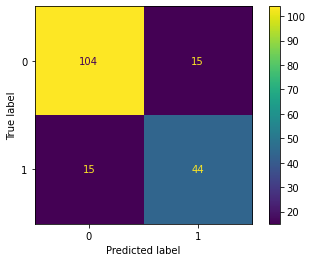

In [16]:

# 1: con las variables base 
y_DT = titanicDF['Survived']
X_DT = titanicDF[['Age','SibSp','Parch', 'Fare','Sex_male','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S']]
X_train, X_test, y_train, y_test = train_test_split(X_DT, y_DT, test_size=0.2)

modelo_DecisionTree( X_train, y_train, X_test, y_test, 3)
modelo_DecisionTree( X_train, y_train, X_test, y_test, 5)

# 2: con las variables base + titulo + isAlone 
X_DT = titanicDF[['Age','SibSp','Parch', 'Fare','Sex_male','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','Title_Miss', \
                    'Title_Mr', 'Title_Mrs', 'Title_Rare', 'IsAlone_cat_True']]
X_train, X_test, y_train, y_test = train_test_split(X_DT, y_DT, test_size=0.2)
modelo_DecisionTree( X_train, y_train, X_test, y_test, 3)
modelo_DecisionTree( X_train, y_train, X_test, y_test, 5)

scaler = preprocessing.StandardScaler()
titanicDF[['SibSp','Fare']] = scaler.fit_transform(titanicDF[['SibSp','Fare']])
scaler = preprocessing.Normalizer(norm='l2', copy=True)

# 3: con las variables base + titulo + isAlone 
# normalizando la tarifa,sib y parch y volviendo variables y usando is_alone como dummy
X_DT = titanicDF[['Age','SibSp_Norm','Parch_Norm', 'Fare_Norm','Sex_male','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S','Title_Miss', \
                    'Title_Mr', 'Title_Mrs', 'Title_Rare', 'IsAlone_cat_True']]
X_train, X_test, y_train, y_test = train_test_split(X_DT, y_DT, test_size=0.2)

modelo_DecisionTree( X_train, y_train, X_test, y_test, 3)
modelo_DecisionTree( X_train, y_train, X_test, y_test, 5)



B.5 Redes Neuronales

In [17]:
# Neuronales (RN1)

cols_n = X_train.shape[1]

inputs = Input(shape=(cols_n))
x = layers.Dense(16, activation="relu")(inputs)
x = layers.Dense(16, activation="relu")(x)
predictions = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs, predictions)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=16, validation_data=(X_test, y_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/16
23/23 [==============================] - 1s 43ms/step - loss: 1.4766 - accuracy: 0.5998 - val_loss: 0.6820 - val_accuracy: 0.6742
Epoch 2/16
23/23 [==============================] - 0s 2ms/step - loss: 0.7699 - accuracy: 0.4706 - val_loss: 0.6284 - v

In [18]:
# Neuronales (RN2)

cols_n = X_train.shape[1]

inputs = Input(shape=(cols_n))
x = layers.Dense(8, activation="relu")(inputs)
x = layers.Dense(12, activation="relu")(x)
x = layers.Dense(12, activation="relu")(x)
predictions = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs, predictions)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=16, validation_data=(X_test, y_test))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 413
Trainable params: 413
Non-trainable params: 0
_________________________________________________________________
Epoch 1/16
23/23 [==============================] - 1s 8ms/step - loss: 0.6802 - accuracy: 0.5827 - val_loss: 0.6400 - val_accu

In [19]:
# Neuronales (RN3)

cols_n = X_train.shape[1]

inputs = Input(shape=(cols_n))
x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(128, activation="relu")(x)
predictions = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs, predictions)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=16, validation_data=(X_test, y_test))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 18,817
Trainable params: 18,817
Non-trainable params: 0
_________________________________________________________________
Epoch 1/16
23/23 [==============================] - 1s 8ms/step - loss: 1.0180 - accuracy: 0.5468 - val_loss: 0.5555 - val_accuracy: 0.6910
Epoch 2/16
23/23 [==============================] - 0s 3ms/step - loss: 0.5897 - accuracy: 0.6955 - val_loss: 0.5

In [20]:
# Neuronales (RN4)

cols_n = X_train.shape[1]

inputs = Input(shape=(cols_n))
x = layers.Dense(9, activation="relu")(inputs)
x = layers.Dense(9, activation="relu")(x)
x = layers.Dense(5, activation="relu")(x)
predictions = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs, predictions)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=32, validation_data=(X_test, y_test))

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 9)                 153       
_________________________________________________________________
dense_11 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 50        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 6         
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32
23/23 [==============================] - 1s 8ms/step - loss: 0.7412 - accuracy: 0.5972 - val_loss: 0.6570 - val_accu

In [21]:
X1 = titanicDF[['Age','SibSp','Parch', 'Fare','Sex_male','Pclass_2','Pclass_3','Embarked_Q','Embarked_S','Title_Miss','Title_Mr','Title_Mrs','IsAlone']]
y1 = titanicDF['Survived']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

cols_n = X1_train.shape[1]
inputs = Input(shape=(cols_n))
x = layers.Dense(32, activation="relu")(inputs)
predictions = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs, predictions)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()
model.fit(X1_train, y1_train, epochs=32, validation_data=(X1_test, y1_test))

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32
23/23 [==============================] - 1s 7ms/step - loss: 1.0531 - accuracy: 0.5893 - val_loss: 0.7882 - val_accuracy: 0.2360
Epoch 2/32
23/23 [==============================] - 0s 2ms/step - loss: 0.7343 - accuracy: 0.4490 - val_loss: 0.6684 - val_accuracy: 0.6067
Epoch 3/32
23/23 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6587 - val_loss: 0